# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observable Trends:
* As expected for March, the farther north of the equator the lower the maximum temperatures experienced in the northern hemisphere
* No apparent relationship between wind speed and latitude. Currently only a few cities north of 40 degrees are experiencing winds above 30 mph
* Most selected cities are relatively humid, 60% and above, regardless of their latitude

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
#     if len(cities) >= 123:
#         break

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cty = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp= []
wind_speed = []
rec_no = 0
set_no = 1

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:

    query_url = f"{url}appid={api_key}&q={city}&units={units}"

    # Get weather data
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        rec_no = rec_no + 1
        print(f"Processing Record {rec_no} of Set {set_no} | {city}" )
        cty.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(time.strftime("%x",time.localtime(weather_json['dt'])))
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])

    except KeyError:
        print(f"City not found. Skipping Record {rec_no} of Set {set_no}... | {city}")
    
    # limits calls to 60 per minute to comply with OpenWeatherMap Free account limit
    if rec_no == 60:
        rec_no = 0
        # pause for 50 seconds. Under assumption that 60 calls will take at least 10 seconds
        time.sleep(50)
        set_no = set_no + 1

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")




Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | baykit
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | omboue
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | broken hill
Processing Record 6 of Set 1 | magadan
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | toliary
City not found. Skipping Record 8 of Set 1... | toliary
Processing Record 9 of Set 1 | marzuq
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping Record 11 of Set 1... | belushya guba
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | atar
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping Record 17 of Set 1... | taolanaro
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | itamaraca
Proc

Processing Record 52 of Set 3 | carnarvon
Processing Record 53 of Set 3 | klaksvik
Processing Record 54 of Set 3 | boyolangu
Processing Record 55 of Set 3 | komsomolskiy
Processing Record 56 of Set 3 | inhambane
Processing Record 57 of Set 3 | rocha
Processing Record 58 of Set 3 | sayville
Processing Record 59 of Set 3 | buala
Processing Record 60 of Set 3 | netarhat
Processing Record 1 of Set 4 | mantua
Processing Record 2 of Set 4 | yulara
Processing Record 3 of Set 4 | fukue
Processing Record 4 of Set 4 | pisco
Processing Record 5 of Set 4 | thaba-tseka
Processing Record 6 of Set 4 | mys shmidta
City not found. Skipping Record 6 of Set 4... | mys shmidta
Processing Record 7 of Set 4 | buraydah
Processing Record 8 of Set 4 | constitucion
Processing Record 9 of Set 4 | thompson
Processing Record 10 of Set 4 | chokurdakh
Processing Record 11 of Set 4 | boa vista
Processing Record 12 of Set 4 | san patricio
Processing Record 13 of Set 4 | kavaratti
Processing Record 14 of Set 4 | kuche


Processing Record 40 of Set 6 | izhevskoye
Processing Record 41 of Set 6 | mugur-aksy
Processing Record 42 of Set 6 | upata
Processing Record 43 of Set 6 | havre-saint-pierre
Processing Record 44 of Set 6 | umzimvubu
City not found. Skipping Record 44 of Set 6... | umzimvubu
Processing Record 45 of Set 6 | chagda
City not found. Skipping Record 45 of Set 6... | chagda
Processing Record 46 of Set 6 | aklavik
Processing Record 47 of Set 6 | kholodnyy
Processing Record 48 of Set 6 | mercedes
Processing Record 49 of Set 6 | fort nelson
Processing Record 50 of Set 6 | rungata
City not found. Skipping Record 50 of Set 6... | rungata
Processing Record 51 of Set 6 | seybaplaya
Processing Record 52 of Set 6 | shingu
Processing Record 53 of Set 6 | inderborskiy
City not found. Skipping Record 53 of Set 6... | inderborskiy
Processing Record 54 of Set 6 | rabaul
Processing Record 55 of Set 6 | half moon bay
Processing Record 56 of Set 6 | longlac
City not found. Skipping Record 56 of Set 6... | lo

Processing Record 34 of Set 9 | plouzane
Processing Record 35 of Set 9 | luwuk
Processing Record 36 of Set 9 | vila
Processing Record 37 of Set 9 | jiddah
City not found. Skipping Record 37 of Set 9... | jiddah
Processing Record 38 of Set 9 | port blair
Processing Record 39 of Set 9 | safford
Processing Record 40 of Set 9 | miraflores
Processing Record 41 of Set 9 | conakry
Processing Record 42 of Set 9 | safaga
City not found. Skipping Record 42 of Set 9... | safaga
Processing Record 43 of Set 9 | vestmannaeyjar
Processing Record 44 of Set 9 | mount gambier
Processing Record 45 of Set 9 | mount isa
Processing Record 46 of Set 9 | graham
Processing Record 47 of Set 9 | azimur
City not found. Skipping Record 47 of Set 9... | azimur
Processing Record 48 of Set 9 | fortuna
Processing Record 49 of Set 9 | ganzhou
Processing Record 50 of Set 9 | crab hill
City not found. Skipping Record 50 of Set 9... | crab hill
Processing Record 51 of Set 9 | tarija
Processing Record 52 of Set 9 | kavieng

In [7]:
# create a data frame from cities
weather_dict = {
    "City": cty,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_dict)
print(len(weather_df))
weather_df.count()

518


City          518
Cloudiness    518
Country       518
Date          518
Humidity      518
Lat           518
Lng           518
Max Temp      518
Wind Speed    518
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df.to_csv(output_data_file, index=False, header=True)

In [9]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Baykit,68,RU,03/14/19,86,61.68,96.39,29.94,10.20
1,Vaini,0,IN,03/14/19,65,15.34,74.49,70.75,2.82
2,Omboue,36,GA,03/14/19,100,-1.57,9.26,80.07,1.59
3,Busselton,0,AU,03/14/19,42,-33.64,115.35,64.99,11.43
4,Broken Hill,0,AU,03/14/19,27,-31.97,141.45,62.60,1.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

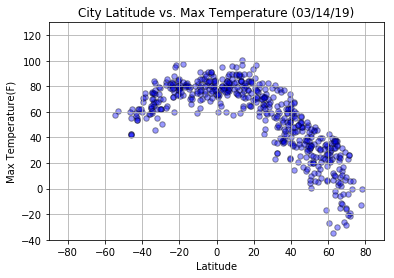

In [10]:
plt.xlim(-90,90)
plt.ylim(-40,130)
plt.title(f"City Latitude vs. Max Temperature ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.scatter(lat, max_temp, marker="o", facecolors ="blue", s=30, edgecolors="black", linewidths = 1, alpha = .4)
plt.grid()

plt.savefig("lat_vs_max_temp.png")
plt.show()


#### Latitude vs. Humidity Plot

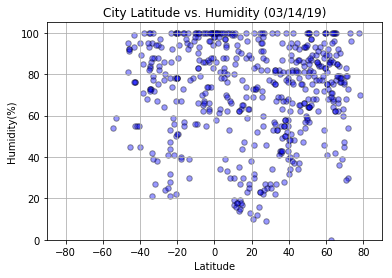

In [11]:
plt.xlim(-90,90)
plt.ylim(0,105)
plt.title(f"City Latitude vs. Humidity ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.scatter(lat, humidity, marker="o", facecolors ="blue", s=30, edgecolors="black", linewidths = 1, alpha = .4)
plt.grid()

plt.savefig("lat_vs_humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

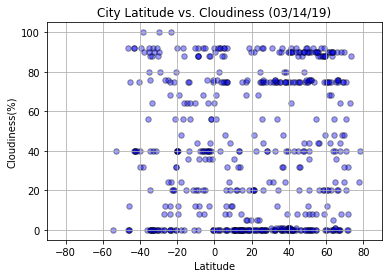

In [12]:
plt.xlim(-90,90)
plt.ylim(-5,105)
plt.title(f"City Latitude vs. Cloudiness ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.scatter(lat, cloudiness, marker="o", facecolors ="blue", s=30, edgecolors="black", linewidths = 1, alpha = .4)
plt.grid()

plt.savefig("lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

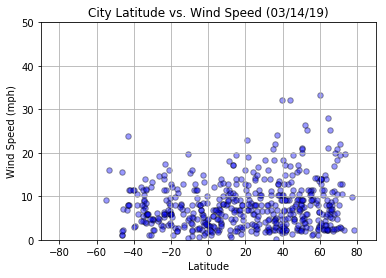

In [13]:
plt.xlim(-90,90)
plt.ylim(0,50)
plt.title(f"City Latitude vs. Wind Speed ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(lat, wind_speed, marker="o", facecolors ="blue", s=30, edgecolors="black", linewidths = 1, alpha = .4)
plt.grid()

plt.savefig("lat_vs_wind_speed.png")
plt.show()